# 1. Clasificación de diabetes con LogisticRegression

Este notebook muestra cómo entrenar y evaluar un modelo de regresión logística sobre el dataset de diabetes usando bibliotecas de Python.

## 2. Importar bibliotecas necesarias

Importamos pandas, numpy y el modelo LogisticRegression de scikit-learn.

In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

## 5. Función para cargar el dataset

Esta función lee un archivo CSV y devuelve los datos normalizados y las etiquetas.

In [2]:
def cargar_dataset(nombre_archivo):
    """
    Carga un dataset CSV, aplica normalización Min-Max, divide en entrenamiento y prueba (80/20)
    y devuelve los datos normalizados y las etiquetas.
    """
    datos = pd.read_csv(nombre_archivo)
    x = np.array(datos.iloc[:, :-1])  # Todas las columnas excepto la última: features
    y = np.array(datos.iloc[:, -1])  # Última columna: etiquetas (Outcome)
    
    # Aplicar normalización Min-Max
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x)
    
    x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, test_size=0.2, random_state=42)
    return x_entrenamiento, x_prueba, y_entrenamiento, y_prueba

## 6. Cargar los datos de entrenamiento y prueba

Usamos la función definida para cargar los datos.

In [3]:
# Cargar los datos de entrenamiento y prueba
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = cargar_dataset("../../datasets/pima_indian_diabetes_dataset/full_dataset.csv")

## 7. Crear y entrenar el modelo LogisticRegression

Entrenamos el modelo y mostramos los coeficientes.

In [4]:
# Crear y entrenar el modelo LogisticRegression
modelo = LogisticRegression()
modelo.fit(x_entrenamiento, y_entrenamiento)

# Mostrar coeficientes del modelo con nombres de columnas
columnas = pd.read_csv("../../datasets/pima_indian_diabetes_dataset/full_dataset.csv").columns[:-1]  # Excluir la columna de etiquetas
print("Coeficientes del modelo (asociados a cada columna):")
for nombre_columna, coef in zip(columnas, modelo.coef_[0]):  # coef_ es una matriz en LogisticRegression
    print(f"{nombre_columna}: {coef:.6f}")

Coeficientes del modelo (asociados a cada columna):
Pregnancies: 0.964179
Glucose: 4.389821
Blood Pressure: -0.563202
Skin Thickness: 0.279829
Insulin: -0.284622
BMI: 3.312216
Diabetes Pedigree Function: 1.131301
Age: 1.715735


## 8. Resultados finales

Mostramos el resumen de los resultados.

In [5]:
# Mostrar resultados finales
# Predecir valores para el conjunto de prueba
y_pred_prob = modelo.predict_proba(x_prueba)[:, 1]  # Probabilidades de la clase positiva
y_pred_clasificado = modelo.predict(x_prueba)  # Predicciones clasificadas (0 o 1)

# Calcular precisión
accuracy = accuracy_score(y_prueba, y_pred_clasificado)
print("-------------------------------")
print("Resultados")
print("-------------------------------")
print("Muestras de entrenamiento: ", len(x_entrenamiento))
print("Muestras de prueba: ", len(x_prueba))
print("Precisión en prueba: ", round(accuracy * 100, 2), "%")

-------------------------------
Resultados
-------------------------------
Muestras de entrenamiento:  614
Muestras de prueba:  154
Precisión en prueba:  76.62 %


## 9. ¿Cómo funciona el modelo?

El modelo de regresión logística genera una probabilidad como salida. Para clasificar los resultados en dos categorías (0 o 1), se utiliza un umbral de decisión. En este caso, las probabilidades se clasifican como 1 si son mayores o iguales a 0.5, y como 0 en caso contrario.

El modelo utiliza la siguiente función logística para predecir la probabilidad de la clase positiva:

$$
P(y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot \text{Pregnancies} + \beta_2 \cdot \text{Glucose} + \ldots + \beta_8 \cdot \text{Age})}}
$$

Donde los coeficientes ($\beta$) del modelo son los siguientes:

- Pregnancies: $0.964179$
- Glucose: $4.389821$
- Blood Pressure: $-0.563202$
- Skin Thickness: $0.279829$
- Insulin: $-0.284622$
- BMI: $3.312216$
- Diabetes Pedigree Function: $1.131301$
- Age: $1.715735$

## 10. ¿Cómo se estiman los valores $\beta$?

En regresión logística, los valores $\beta$ (coeficientes) se estiman utilizando el método de máxima likelihood. Este método busca encontrar los parámetros que maximizan la probabilidad de que el modelo prediga correctamente los resultados observados en los datos.

La función de likelihood mide qué tan bien los parámetros actuales del modelo explican los datos observados. Se define como:

$$
L(\beta) = \prod_{i=1}^n P(y_i | x_i, \beta)
$$

Donde:
- $P(y_i | x_i, \beta)$ es la probabilidad predicha por el modelo para la observación $i$.
- $n$ es el número total de observaciones.

En la práctica, se utiliza el logaritmo de la función de likelihood (log-likelihood) para simplificar los cálculos y convertir el producto en una suma:

$$
\log L(\beta) = \sum_{i=1}^n \left[ y_i \log(P(y_i | x_i, \beta)) + (1 - y_i) \log(1 - P(y_i | x_i, \beta)) \right]
$$

El modelo ajusta los coeficientes $\beta$ para maximizar esta función log-likelihood, lo que significa que encuentra los valores de $\beta$ que hacen que las predicciones del modelo sean lo más cercanas posible a los valores reales observados.

## 11. Visualización de probabilidades vs valores reales

En esta sección, se realiza una visualización comparativa entre las probabilidades predichas por el modelo (`y_pred_prob_sorted`) y los valores reales de la variable objetivo (`y_prueba_sorted`) en el conjunto de prueba. Ambos conjuntos están ordenados por el valor real para facilitar la interpretación.

El gráfico incluye:
- Las probabilidades predichas (`y_pred_prob_sorted`) en azul.
- Los valores reales (`y_prueba_sorted`) en rojo.
- Una línea horizontal verde que representa el umbral de decisión (0.5) utilizado para clasificar los resultados.

Esta visualización permite observar gráficamente el desempeño del modelo al clasificar los casos de diabetes y qué tan cerca están las probabilidades predichas de los valores reales.

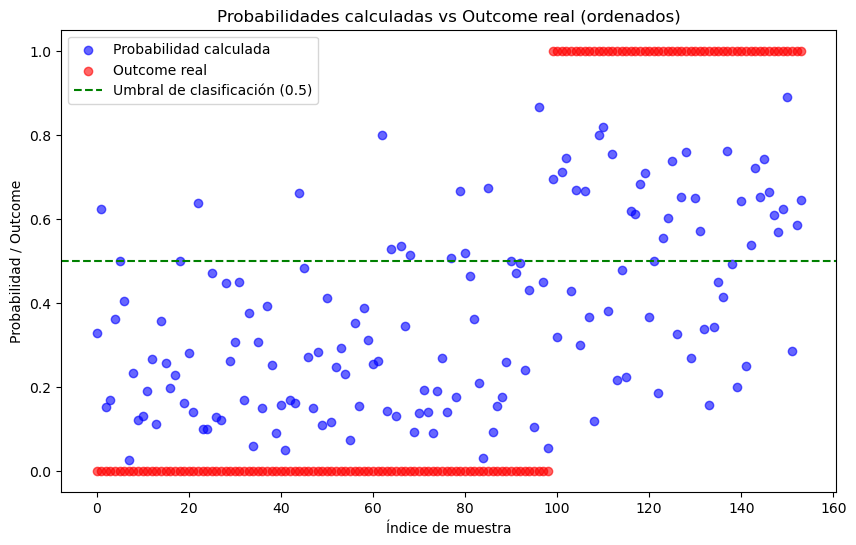

In [6]:
# Ordenar el test dataset por el outcome (0 primero, 1 después)
import pandas as pd

# Crear un DataFrame temporal para ordenar
test_data = pd.DataFrame({
    "y_pred_prob": y_pred_prob,
    "y_prueba": y_prueba
})

# Ordenar por la columna 'y_prueba'
test_data_sorted = test_data.sort_values(by="y_prueba").reset_index(drop=True)

# Actualizar los valores ordenados
y_pred_prob_sorted = test_data_sorted["y_pred_prob"].values
y_prueba_sorted = test_data_sorted["y_prueba"].values

# Graficar las probabilidades calculadas junto con el outcome real (ordenados)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_pred_prob_sorted)), y_pred_prob_sorted, label="Probabilidad calculada", color="blue", alpha=0.6)
plt.scatter(range(len(y_prueba_sorted)), y_prueba_sorted, label="Outcome real", color="red", alpha=0.6)
plt.axhline(0.5, color="green", linestyle="--", label="Umbral de clasificación (0.5)")
plt.title("Probabilidades calculadas vs Outcome real (ordenados)")
plt.xlabel("Índice de muestra")
plt.ylabel("Probabilidad / Outcome")
plt.legend()
plt.show()